<a href="https://colab.research.google.com/github/Rafat97/rafat97-content-static/blob/main/CSE4214_Pattern_Recognition_Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Author info
<center>

| |  |
| ----------- | ----------- |
| ![Emdadul Haque Rafat](https://rafat97.github.io/static/c3688eb99d1fef50023a121e3abc5fa6/e8044/my-image.jpg)      | `Name:` Emdadul Haque<br /><br /> `Professional Status:` Student of Computer Science and Engineering <br /><br /> `Email:` rafathaque1997@gmail.com <br /><br /> `Website :` https://rafat97.github.io/ <br /><br />`Github:` https://github.com/Rafat97 <br /><br /> `Linkedin:` https://www.linkedin.com/in/rafat-haque-173131139/   |

</center>

In [1]:
!wget https://raw.githubusercontent.com/Rafat97/rafat97-content-static/main/Machine%20Learning/Class/test-Minimum-Error-Rate-Classifier.zip
!unzip -o ./test-Minimum-Error-Rate-Classifier.zip
!rm ./test-Minimum-Error-Rate-Classifier.zip

--2021-08-25 16:19:53--  https://raw.githubusercontent.com/Rafat97/rafat97-content-static/main/Machine%20Learning/Class/test-Minimum-Error-Rate-Classifier.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242 [application/zip]
Saving to: ‘test-Minimum-Error-Rate-Classifier.zip’

test-Minimum-Error- 100%[===================>]     242  --.-KB/s    in 0s      

2021-08-25 16:19:53 (10.2 MB/s) - ‘test-Minimum-Error-Rate-Classifier.zip’ saved [242/242]

Archive:  ./test-Minimum-Error-Rate-Classifier.zip
  inflating: test-Minimum-Error-Rate-Classifier.txt  


In [2]:
import pandas as pd
import warnings
import math
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,LinearRegression,ElasticNet,BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from matplotlib.font_manager import FontProperties
import plotly.graph_objects as go
from scipy.stats import multivariate_normal
!pip install torchsummary
from torchsummary import summary

np.random.seed(42)

%matplotlib inline

In [3]:
train_path = "./test-Minimum-Error-Rate-Classifier.txt"

df_train = pd.read_csv(train_path, sep = "," ,names=["f_1","f_2",])
df_train

,f_1,f_2
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [4]:
Data_matrix = df_train.to_numpy()
Data_matrix

array([[ 1. ,  1. ],
       [ 1. , -1. ],
       [ 4. ,  5. ],
       [-2. ,  2.5],
       [ 0. ,  2. ],
       [ 2. , -3. ]])

In [5]:
## GIVEN QUESTION

MUE_CLASS_1 = [0,0]
SUM_OF_CLASS_1 = [
                  [0.25,0.3],
                  [0.3,1]
                ]
OMEGA_CLASS_1 = 0.5

MUE_CLASS_2 = [2,2]
SUM_OF_CLASS_2 = [
                  [0.5,0],
                  [0,0.5]
                 ]
OMEGA_CLASS_2 = 0.5

In [6]:
D = 2

In [7]:
# equation implement 
calculate_value_1 = []
for data in Data_matrix:
  eqaPart1 = 1 / (math.sqrt( math.pow( 2 * math.pi , D) * abs( np.linalg.det(SUM_OF_CLASS_1)) )) 
  eqaPart2 =  math.exp( -0.5 * np.dot( np.dot( np.subtract(data , MUE_CLASS_1).T , np.linalg.inv(SUM_OF_CLASS_1) ) , np.subtract(data , MUE_CLASS_1)) )
  fullEq = eqaPart1 * eqaPart2 
  prob = fullEq * OMEGA_CLASS_1
  calculate_value_1.append(prob)

calculate_value_1

[0.026095731682525155,
 0.0006137127856362326,
 2.4419401818108763e-15,
 4.763869193476966e-13,
 0.008740975213082243,
 8.523208716126741e-15]

In [8]:
calculate_value_2 = []
for data in Data_matrix:
  eqaPart1 = 1 / (math.sqrt( math.pow( 2 * math.pi , D) * abs( np.linalg.det(SUM_OF_CLASS_2)) )) 
  eqaPart2 =  math.exp( -0.5 * np.dot( np.dot( np.subtract(data , MUE_CLASS_2).T , np.linalg.inv(SUM_OF_CLASS_2) ) , np.subtract(data , MUE_CLASS_2)) )
  fullEq = eqaPart1 * eqaPart2 
  prob = fullEq * OMEGA_CLASS_2
  calculate_value_2.append(prob)

calculate_value_2

[0.021539279301848634,
 7.225623237724323e-06,
 3.5974259813700723e-07,
 1.394873426608797e-08,
 0.0029150244650281935,
 2.2103349154917858e-12]

In [9]:
calculate_value_1,calculate_value_2
predected_allClass = []
accepted_prob = []
for i in range(len(calculate_value_1)):
  if calculate_value_1[i] > calculate_value_2[i]:
    predected_allClass.append(1)
    accepted_prob.append(calculate_value_1[i])
  else:
    predected_allClass.append(2)
    accepted_prob.append(calculate_value_2[i])

predected_allClass

[1, 1, 2, 2, 1, 2]

In [10]:
df_train['predict_class'] = predected_allClass
df_train['propb_class_1'] = calculate_value_1
df_train['propb_class_2'] = calculate_value_2
df_train['prob_accepted'] = accepted_prob
df_train

,f_1,f_2,predict_class,propb_class_1,propb_class_2,prob_accepted
0,1,1.0,1,2.609573e-02,2.153928e-02,2.609573e-02
1,1,-1.0,1,6.137128e-04,7.225623e-06,6.137128e-04
2,4,5.0,2,2.441940e-15,3.597426e-07,3.597426e-07
3,-2,2.5,2,4.763869e-13,1.394873e-08,1.394873e-08
4,0,2.0,1,8.740975e-03,2.915024e-03,8.740975e-03
5,2,-3.0,2,8.523209e-15,2.210335e-12,2.210335e-12


In [11]:
train_c1 = df_train[df_train['predict_class'] == 1]
train_c2 = df_train[df_train['predict_class'] == 2]

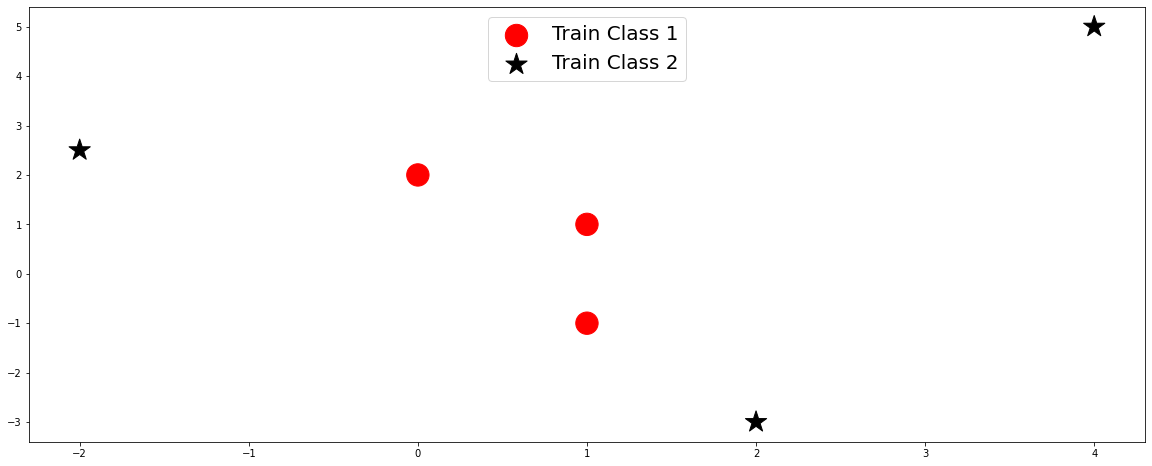

In [12]:
s = [500 for n in range(len(train_c1))]
s2 = [500 for n in range(len(train_c2))]
plt.figure(figsize=(20,8))
plt.scatter(train_c1['f_1'], train_c1['f_2'], marker = 'o',s=s, color = 'red', label = 'Train Class 1')
plt.scatter(train_c2['f_1'], train_c2['f_2'],  marker = '*',s=s2, color = 'black', label = 'Train Class 2')
plt.legend(prop={'size':20},loc=9)
plt.savefig("1_train.jpg")
plt.show()

In [13]:
Data_matrix = df_train.to_numpy()

In [14]:
train_c1

,f_1,f_2,predict_class,propb_class_1,propb_class_2,prob_accepted
0,1,1.0,1,0.026096,0.021539,0.026096
1,1,-1.0,1,0.000614,0.000007,0.000614
4,0,2.0,1,0.008741,0.002915,0.008741


In [15]:
train_c1.describe()

,f_1,f_2,predict_class,propb_class_1,propb_class_2,prob_accepted
count,3.000000,3.000000,3.0,3.000000,3.000000,3.000000
mean,0.666667,0.666667,1.0,0.011817,0.008154,0.011817
std,0.577350,1.527525,0.0,0.013016,0.011683,0.013016
min,0.000000,-1.000000,1.0,0.000614,0.000007,0.000614
25%,0.500000,0.000000,1.0,0.004677,0.001461,0.004677
50%,1.000000,1.000000,1.0,0.008741,0.002915,0.008741
75%,1.000000,1.500000,1.0,0.017418,0.012227,0.017418
max,1.000000,2.000000,1.0,0.026096,0.021539,0.026096


<Figure size 1152x432 with 0 Axes>

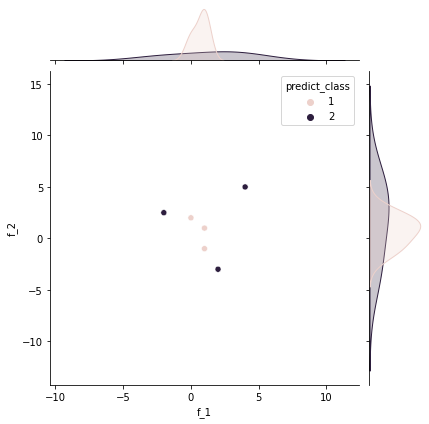

In [16]:
plt.figure(figsize=(16, 6))
sns.jointplot(data=df_train, x="f_1", y="f_2", hue="predict_class",)

In [17]:
def multivariate_normal_eq(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

def surface_values(x,y,nb_of_x,mean, covariance, d):

    x1, x2 = np.meshgrid(x, y) 
    pdf = np.zeros((nb_of_x, nb_of_x))

    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal_eq(np.matrix([[x1[i,j]], [x2[i,j]]]), d, mean, covariance)
    return x1, x2, pdf 


In [22]:
number_pont = 100
x_val = np.linspace(-6,6,number_pont)
y_val = np.linspace(-6,6,number_pont)


mean_class1 = np.matrix([[0.], [0.]])
X, Y, Z = surface_values(x_val,y_val,number_pont,
                           mean_class1, SUM_OF_CLASS_1, D)

mean_class2 = np.matrix([[2.], [2.]])
X, Y, Z2 = surface_values(x_val,y_val,number_pont,
                            mean_class2, SUM_OF_CLASS_2, D)

x = X
y = Y
z1 = Z
z2 = Z2


fig = go.Figure(data=[
                      # go.Surface(x=x,y=y,z=z1-5 ),
                      go.Surface(x=x,y=y,z=z1*20 , ),
                      go.Surface(x=x,y=y,z=z2*20 , ),
                      go.Surface(x=x,y=y,z=z1+z2 -5 ,opacity=0.5,
                                 contours = {
                                      # "x": {"show": True, "start": -6, "end": 6, "size": 0.04,  "color":"white", },
                                      # "y": {"show": True, "start": -6, "end": 6, "size": 0.04,  "color":"white", },
                                      "z": {"show": True, "start": -6, "end": 6, "size": 0.04,  "color":"white",  },
                                  }
                                 
                                 ),
                       go.Surface(x=x,y=y,z=(z1-z2)-3  ,opacity=0.3,),
                      
                      go.Scatter3d(x=train_c1['f_1'], y=train_c1['f_2'],z=np.ones( len( train_c1['predict_class'])),mode='markers'),
                      go.Scatter3d(x=train_c2['f_1'], y=train_c2['f_2'],z=np.ones( len( train_c1['predict_class'])),mode='markers'),
                     
                      ])

# fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))


fig.update_layout(title='3D Ploting',autosize=True,
                  width=900, height=900, 
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


In [20]:
# fig = plt.figure(figsize=(20,20))
# ax = fig.gca(projection='3d')
# ax.plot_surface(x, y, z1, rstride=8, cstride=8, alpha=0.3)
# ax.set_xlabel('X axis')
# ax.set_ylabel('Y axis')
# ax.set_zlabel('Z axis')

# ax.plot_surface(x, y, z2, rstride=8, cstride=8, alpha=0.3)
# ax.set_xlabel('X axis')
# ax.set_ylabel('Y axis')
# ax.set_zlabel('Z axis')


# cset = ax.contour(x, y, z1, zdir='z', offset=-0.4,)
# cset = ax.contour(x, y, z2, zdir='z', offset=-0.4,)

# ax.scatter(train_c1['f_1'], train_c1['f_2'], marker='o',color='green')
# ax.scatter(train_c2['f_1'], train_c2['f_2'], marker='o',color='red')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# ax.set_xlim([-6,6])
# ax.set_ylim([-6,6])
# ax.set_zlim([-.5,.5])

# plt.show()